# Titanic Data Analysis

This notebook is a companion to the project [Investigate a Dataset](https://classroom.udacity.com/nanodegrees/nd002-cn-basic/parts/fc807c93-f9ac-4063-aece-a40826b57b16/modules/12f2744b-68c6-457a-9707-f3085633d701/lessons/3176718735239847/concepts/53862192490923). The notebook aims to walk through a typical data analysis workflow for solving problems.

---

## 1. QUESTIONS
- 1 Load Data from CSVs
- 2 Brainstorm Questions
- 3 Analyze by Describing Data Variables

Before I come up with any data analysis questions that can be answered by this dataset, I need to get familiar with the data. From [Project Details](https://classroom.udacity.com/nanodegrees/nd002-cn-basic/parts/fc807c93-f9ac-4063-aece-a40826b57b16/modules/12f2744b-68c6-457a-9707-f3085633d701/lessons/3176718735239847/concepts/54201485780923), Titanic Dataset: 

> Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.

We may want to develop some early understanding about *the domain of our problem*. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note:

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, *some groups of people were more likely to survive than others*, such as women, children, and the upper-class.

Let's take a look.

### 1.1 Load Data from CSVs

In [1]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Acquire data
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


[The Kaggle website](https://www.kaggle.com/c/titanic/data) provides descriptions of all data variables. The dataset not only contains demographics and passenger information, but also survival status.

|Variable|Definition|Key|
|:---|:---|:---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

We can brainstorm questions that can be solved by Titanic Dataset (though the data only covers a third of all passengers information). 

### 1.2 Brainstorming Questions
**What factors made people more likely to survive?** Factors like: ticket class, age, cabin, or with family...
* And justify your statement.

### 1.3 Analyze by Describing Data Variables
Inspired by some of Kaggles' data solutions ([here](https://www.kaggle.com/startupsci/titanic-data-science-solutions)'s one), it's helpful to discern the characteristics of data variables. Be noted that we won't analyze variables that describing unique id, like `PassengerID` and `Ticket`.

**Independent & Dependent**

Though it's a *Non-experimental research*, the primary purpose that we probe the titanic dataset is to find out what factors made people more likely to survive.
* Independent variables: features that affect passengers' survival status, as `gender`, `ticket class`, `age`, `marital status`, `families`, `cabins`, `embark ports`.;
* Dependent variables: Survival status of each passenger;

**Categorical & Numerical**

Categorical variables is mostly qualitative.
* Nominal: `Pclass`, `Embarked`.
    * Dichotomous: `Survived`, `Sex`.

Numerical variables is mostly quantitative, continuous.
* Continuous (linear, Interval): `Age`, `Fare`.
* Discrete: `SibSp`, `Parch`.

**Mixed data types**

* Cabin is alphanumeric. 
* Ticket is a mix of numeric and alphanumeric data types.

In [5]:
titanic_df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Based on this description of numerical features in dataset:**
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values, and around 38% samples survived representative of the actual survival rate at 32%.
* At least half of passengers (> 50%) did not travel with families.
* Most passengers (> 75%) did not travel with parents or children.
* At lease half of passengers (> 50%) are young (< 30), and they are not upper class (> 75% are 2nd or 3rd ticket class).
* Fares varied significantly, the top 5% passengers pay fares way more than the rest 95%.
* Few elderly passengers (< 1%) within age range 65-80.

In [6]:
titanic_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ekstrom, Mr. Johan",male,1601,B96 B98,S
freq,1,577,7,4,644


**Based on this description of categorical features in dataset:**
* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, 577/891=0.65)
* Ticket (22%) and Cabin values has several duplicates across samples.
    * Alternatively several passengers shared a cabin.
* Embarked takes 3 possible values. S port used by most passengers.

---

## 2. WRANGLING
- 1 Fixing Data Types
- 2 Problems in the Data and Investigate the Data
- 3 Dig Into Features
- 4 Working With Missing Data
- 5 Wrangle Data

### 2.1 Fixing Data Types

In [7]:
# Change some features' names to make them easier to interpret.
titanic_df.rename(columns={'Sex': 'Gender', 'SibSp': 'Sib_Sp','Parch': 'Par_Ch'}, inplace=True)

# Print out every dtypes of the data set and see if they are all logically correct?
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
Sib_Sp           int64
Par_Ch           int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Based on dtypes print out above, 7 features are integer or floats, and 5 features are strings (object).

* I was considering of taking 'Survived' data and convert them into boolean at first. But it might not be necessary since the value in this column is either '0' or '1', which means the same thing to boolean types.

* Also, it is more convenient to keep 'PassengerId' and 'Pclass' to be int64 but not string here. Because you can sort int64 type of data in order.

**Therefore, all dtypes of the Titanic dataframe is looking great.**

### 2.2 Problems in the Data and Investigate the Data

In [8]:
# Print out the result of checking missing data
def data_checkup_result(pd_data, check_unique):
    if check_unique:
        s1 = "For '%s' column, all data is unique. "% (pd_data.name) if ((len(pd_data.unique()) - pd_data.count()) == 0) \
            else "For '%s' column, there're some duplicate data. "% (pd_data.name)
        s2 = "And there's no empty values in this column." if (pd_data.isnull().sum() == 0) \
            else "And %i empty values in this column." % (pd_data.isnull().sum())
        return s1 + s2
    else:
        return "For '%s' column, There's no empty values in this column."% (pd_data.name) if (pd_data.isnull().sum()==0) \
        else "For '%s' column, there're %i empty values." % (pd_data.name, pd_data.isnull().sum())    

In [9]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
Sib_Sp           0
Par_Ch           0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


'Cabin' and 'Age' features are missing quite a lot of data.

In [10]:
for col_name in titanic_df.columns.values:
    if col_name in ['PassengerId', 'Ticket']:
        print(data_checkup_result(titanic_df[col_name], True))
    else:
        print(data_checkup_result(titanic_df[col_name], False))

For 'PassengerId' column, all data is unique. And there's no empty values in this column.
For 'Survived' column, There's no empty values in this column.
For 'Pclass' column, There's no empty values in this column.
For 'Name' column, There's no empty values in this column.
For 'Gender' column, There's no empty values in this column.
For 'Age' column, there're 177 empty values.
For 'Sib_Sp' column, There's no empty values in this column.
For 'Par_Ch' column, There's no empty values in this column.
For 'Ticket' column, there're some duplicate data. And there's no empty values in this column.
For 'Fare' column, There's no empty values in this column.
For 'Cabin' column, there're 687 empty values.
For 'Embarked' column, there're 2 empty values.


`Cabin` \ `Age` \ `Embarked` features contain a number of null values;

These will require correcting.

In [11]:
# Check if how many data is out of scope
def check_data_outside_scope(df_col, scope_list):
    i = 0
    for data in df_col:
        if data not in scope_list:
            i += 1
    return i

def check_scope_result(num_out_scope, col_name):
    return ("All data values in '%s' column in scope."% (col_name) if num_out_scope == 0 else \
           "There're {a:d} data in {b:s} column running outide the scope.".format(a=num_out_scope, b=col_name))
        
# Check if any data's value is running out of scope
# Return a dict for key is passengerId, value is the data.
print(check_scope_result(check_data_outside_scope(titanic_df['Survived'], [0,1]), 'Survived'))
print(check_scope_result(check_data_outside_scope(titanic_df['Pclass'], [1,2,3]), 'Pclass'))
print(check_scope_result(check_data_outside_scope(titanic_df['Embarked'], ['C','Q','S']), 'Embarked'))


All data values in 'Survived' column in scope.
All data values in 'Pclass' column in scope.
There're 2 data in Embarked column running outide the scope.


Obviously, these 2 data in `Embarked` column which outside the scope are all empty values.

### Dig Into Features
Before we try to fix data for every features, I want to dig deep. Simply with knowledge we gain from above, I try to look at these features and see if I can get some thoughts for next phase.

In order to answer the question, I need to find out the factor that has the highest *correlation with* the `Survived` status.

|Features|dtype|Need_Analysis|Need_Fixing|
|:---|:---:|:---:|:---:|
|`PassengerId`|int64|||
|`Pclass`|int64|&#x2705;||
|`Name`|object|||
|`Sex`|object|&#x2705;||
|`Age`|float64|&#x2705;|&#x2705;|
|`Sib_Sp`|int64|&#x2705;||
|`Par_Ch`|int64|&#x2705;||
|`Ticket`|object|||
|`Fare`|float64|&#x2705;||
|`Cabin`|object|||
|`Embarked`|object|&#x2705;|&#x2705;|

* `PassengerId`, `Ticket`, and `Name` are just identifications for passengers and tickets. They doesn't convey any meaningful information about each passenger. 
* But `Name` feature has `Title` information. We can extract it as a new feature.
* `Cabin` may be dropped because most of value in this feature is empty.
* Though `Age` and `Embarked` are incomplete, they are definitely correlated to `survival` status. That means these two columns need completing.
* `Sib_Sp` and `Par_Ch` can be combined to create a new feature `Family`, to show total count of family members on board.

In [12]:
# Create `Family` based on `Sib_Sp` and `Par_Ch`
titanic_df['Family_Size'] = titanic_df['Sib_Sp'] + titanic_df['Par_Ch'] + 1

In [13]:
titanic_df['Alone'] = False
titanic_df.loc[titanic_df['Family_Size'] == 1, 'Alone'] = True

In [14]:
# Extract `Title` from `Name`
titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_df['Title'], titanic_df['Gender'])

Gender,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
# Replace rare titles to a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

### Working with Missing Data

From what we know above, all missing data have been represented as `NaN`, and it would present difficulties later when trying to conduct analysis to all these incomplete values. So we need to fix this issue for `Embarked`, `Cabin`, `Age`, in which missing data exists.

Basically, we work with missing data by finding the degree of association between target feature and other feature. Here's the assumption I hold: *as the degree of association gets higher, the likihood of similar values for the feature in specific group gets higher.* What follows is a brief overview of statistical analysis that I am going to conduct to figure out relationships:
* `Embarked`: since values in it are nominal variables of 3 different categories, and only 2 values are missing. So I will just fill the most frequent occurence in.
* `Cabin`: over three-fouths of data is missing in this feature, and also values are just an identifier for each space. So I will simply remove this column. But I am curious of the relationship between the existence of `Cabin` information and passengers in different `Pclass`. I will conduct *Chi-square test* to see the relationship.
* `Age`: things get complex here, for `Age` can be related to multiple features. There're lots of possibilities here. I will conduct *One-way ANOVA test* to explore relationships.

#### Define helper functions conduct statistical analysis
1. *One-way ANOVA*
2. *Chi-square*

In [16]:
# 1. One-way ANOVA
def get_f_stats(df):
    grand_mean = df.stack().mean()

    ss_between = 0
    for col in df.columns:
        ss_between = ss_between + df[col].notnull().sum() * ((df[col].mean() - grand_mean)**2)
    ss_within = ((df - df.mean())**2).stack().sum()
    
    df_between, df_within = len(df.columns) - 1, df.notnull().stack().sum() - len(df.columns)
    ms_between, ms_within = ss_between / df_between, ss_within / df_within
    
    return ms_between / ms_within

def conduct_hsd_analysis(df, q_critical):
    ss_within = ((df - df.mean())**2).stack().sum()
    df_within = df.notnull().stack().sum() - len(df.columns)
    
    tukeys_hsd = q_critical * ((ss_within / df_within) / len(df.index))**(1/2.)
    
    from itertools import combinations
    for subset in combinations(df.columns, 2):
        print("The differences between %s and %s is honestly significant."% (subset[0], subset[1]) if abs(df[subset[0]].mean() - df[subset[1]].mean()) > tukeys_hsd else "They are not honestly significantly different")
    return tukeys_hsd

def get_cohens_d(df):
    ss_within = ((df - df.mean())**2).stack().sum()
    df_within = df.notnull().stack().sum() - len(df.columns)
    
    cohens_dict = {}
    from itertools import combinations
    for subset in combinations(df.columns, 2):
        cohens_dict[subset] = (df[subset[0]].mean() - df[subset[1]].mean()) / ((ss_within / df_within) ** (1/2.))
    
    return cohens_dict

def get_eta_squared(df):
    ss_between = 0
    for col in df.columns:
        ss_between = ss_between + df[col].notnull().sum() * ((df[col].mean() - df.stack().mean())**2)
    
    ss_within = ((df - df.mean())**2).stack().sum()
    
    return ss_between / (ss_between + ss_within)

In [17]:
# 2. Chi-square
def get_chi_square(df_obs):
    
    def get_expected(df_obs):
        df_exp = df_obs.copy()

        for row in df_obs.index:
            for col in df_obs.columns:
                df_exp.loc[row,col] = df_obs[col].values.sum() * df_obs.loc[row].values.sum() / df_obs.values.sum()

        return df_exp

    return ((df_obs - get_expected(df_obs))**2 / get_expected(df_obs)).values.sum()

def get_cramers_v(df_obs):
    
    def get_expected(df_obs):
        df_exp = df_obs.copy()

        for row in df_obs.index:
            for col in df_obs.columns:
                df_exp.loc[row,col] = df_obs[col].values.sum() * df_obs.loc[row].values.sum() / df_obs.values.sum()

        return df_exp

    chi_square = ((df_obs - get_expected(df_obs))**2 / get_expected(df_obs)).values.sum()
    k = min(len(df_obs.columns), len(df_obs.index))
    
    return (chi_square / (df_obs.values.sum() * (k-1))) ** (1/2.)

#### *Embarked* values

The `Embarked` feature only has 2 missing values, I will simply fill with the most frequent occurance here, which means, the mode.

In [18]:
# Find the most common occurance
freq_port = titanic_df['Embarked'].mode()[0]

In [19]:
# Fill the missing data with the most frequent value
titanic_df['Embarked'].fillna(freq_port, inplace=True)

print("Now embarked feature has %s empty value." % titanic_df['Embarked'].isnull().sum())

Now embarked feature has 0 empty value.


In [20]:
titanic_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

#### *Cabin* values

`Cabin` feature is just an identifier for each space. It doesn't tell us any meaningful information about this passenger. Also, most values in it are empty (over 75% of values), I will drop this feature for its incompleteness and uselessness.

But before removing it, I will use a contingency table to conduct *Chi-square test* to see if the existence of `Cabin` information has relationships with `Pclass`.

In [21]:
cabin_contingency = pd.crosstab(titanic_df['Cabin'].isnull(), titanic_df['Pclass'], rownames=['No Cabin Info'], colnames=['Pclass'])
cabin_contingency

Pclass,1,2,3
No Cabin Info,,,
False,176,16,12
True,40,168,479


In [22]:
get_chi_square(cabin_contingency)

557.31026294018488

In [23]:
from scipy.stats import chi2
chi_critical = chi2.isf(q=0.005, df=2)
chi_critical

10.596634733096073

The chi-square is far bigger than chi-square critical value (10.597 for alpha=0.005 and df=2). We can conclude that the result is significant, since the p-value of this chi-square testing is so small that it's unlikely the result are due to sampling error.

So, `Pclass` values associate with the existence of `Cabin` information for each passenger. It's likely that the higher the class of which the passenger is, the less likely of missing `Cabin` information.

In [24]:
# Drop Cabin
titanic_df = titanic_df.drop(['Cabin'], axis=1)
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
Sib_Sp           int64
Par_Ch           int64
Ticket          object
Fare           float64
Embarked        object
Family_Size      int64
Alone             bool
Title           object
dtype: object

#### *Age* values
Almost 20 percent of values are missing in this column. We want to fill values in based on relationships. The one with highest degree of association with `Age` is the one gives most weights to the age value we try guess. `Age` is continuous numerical variables, so we can conduct *One-Way ANOVA test* with nominal variables, like `Pclass`, `Family_Size`, `Gender`, `Embarked`.

Rather than generate random numbers between mean and standard deviation, I will guess missing values by classifying data into groups based on related features.
1. Describe 'Age' data, and get a big picture of data;
2. Plot 'Age' and see how data distributes;
3. Normalize data into the range of [0, 10], and exclude outliers;
4. Measure relationships between 'Age' and other features, and rank them to find the one who has the highest degree of association;
5. Classify data into groups;
6. Fill missing 'Age' data based on statistical analysis to each group;
7. Return missing data to Titanic dataframe;

In [25]:
# Describe data of 'Age' feature, and see how many empty data in it.
print(titanic_df['Age'].describe())
print("\n")
print('Null data: %i' % titanic_df['Age'].isnull().sum())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Null data: 177


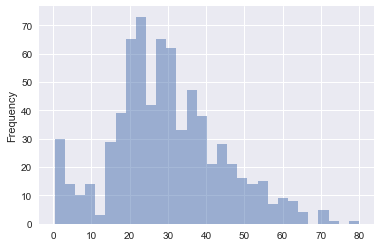

In [26]:
titanic_df['Age'].plot.hist(alpha=0.5, bins=30, rwidth=1)

Let's normalize data into range [0,10], to lessen the effect of scale differences.

> Explicitly explain your reason why you do this.

In [27]:
# Feature Scaling
def normalize_scaling(i, max_data, min_data, range_tuple=(0,10)):
    return range_tuple[0] + ((i - min_data)*(range_tuple[1] - range_tuple[0])) / (max_data - min_data)

titanic_df['Age'] = titanic_df['Age'].apply(lambda i:normalize_scaling(i, titanic_df['Age'].max(), titanic_df['Age'].min()))

In [28]:
print(titanic_df['Age'].describe())
print("\n")
print('Mode is %f'%titanic_df['Age'].mode())

count    714.000000
mean       3.679206
std        1.825395
min        0.000000
25%        2.476125
50%        3.465695
75%        4.722292
max       10.000000
Name: Age, dtype: float64


Mode is 2.963056


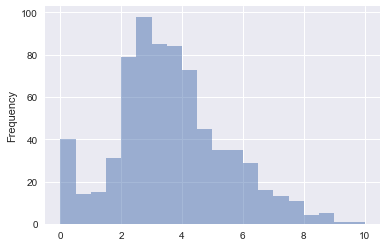

In [29]:
titanic_df['Age'].plot.hist(alpha=0.5, bins=20, rwidth=10)

There're outliers in this sample since the maximum in the sample is larger than the upper bound of outlier.


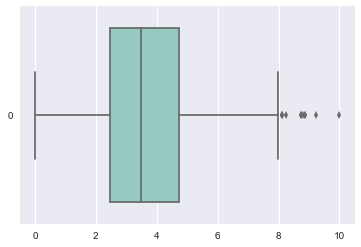

In [30]:
# See if there's any outliers in this sample data
titanic_df_iqr = titanic_df['Age'].quantile(.75) - titanic_df['Age'].quantile(.25)
titanic_df_outlier_upper = titanic_df['Age'].quantile(.75) + 1.5*titanic_df_iqr
titanic_df_outlier_lower = titanic_df['Age'].quantile(.25) - 1.5*titanic_df_iqr

if titanic_df['Age'].max() < titanic_df_outlier_upper:
    if titanic_df['Age'].min() > titanic_df_outlier_lower:
        print("There's no outlier in this sample.")
    else:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier.")
else:
    if titanic_df['Age'].min() < titanic_df_outlier_lower:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier, and the maximum in the sample is larger than the upper bound of outlier.")
    else:
        print("There're outliers in this sample since the maximum in the sample is larger than the upper bound of outlier.")

sns.boxplot(data=titanic_df['Age'], orient="h", palette="Set3")

In [31]:
# Exclude outliers and NaN data
titanic_age_sample = titanic_df[np.abs(titanic_df['Age'] - titanic_df['Age'].mean())<=(3*titanic_df['Age'].std())]

In [33]:
# Measure degree of associations by ANOVA
from scipy.stats import f

f_stats = {}
for col in titanic_age_sample.columns & ['Pclass', 'Gender', 'Embarked', 'Family_Size']:
    titanic_age_temp = titanic_age_sample.pivot_table(index=['PassengerId'], columns=col, values='Age')
    f_stats[(col,'Age')] = (get_f_stats(titanic_age_temp),f.ppf(q=1-0.05, dfn=len(titanic_age_temp.columns)-1, dfd=titanic_age_temp.notnull().values.sum()-len(titanic_age_temp.columns)))
    print("The f-stats between %s and Age is %f. " % (col, f_stats[(col,'Age')][0]) + ("It's bigger than f-critical value %f." % (f_stats[(col,'Age')][1]) if f_stats[(col,'Age')][0]>f_stats[(col,'Age')][1] else "It's smaller than f-critical value %f." % (f_stats[(col,'Age')][1])))

The f-stats between Pclass and Age is 58.166241. It's bigger than f-critical value 3.008426.
The f-stats between Gender and Age is 5.503008. It's bigger than f-critical value 3.854589.
The f-stats between Embarked and Age is 0.706100. It's smaller than f-critical value 3.008426.
The f-stats between Family_Size and Age is 11.237204. It's bigger than f-critical value 2.022569.


I am curious: whether the association between `Age` and `Gender` is largely due to the connection between `Gender` and (`Pclass` and `Family_Size`), or not. To test this assumption, I will conduct *Chi-square test*: big Chi-stats can prove relations.

In [34]:
gender_pf_contingency = pd.crosstab(titanic_age_sample['Gender'], [titanic_age_sample['Pclass'], titanic_age_sample['Family_Size']], rownames=['Gender'], colnames=['Pclass', 'Family_Size'])

print("The chi-stats between 'Gender' and ('Pclass', 'Family_Size') is %f. " % (get_chi_square(gender_pf_contingency)) + ("It's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=len(gender_pf_contingency)-1)) if get_chi_square(gender_pf_contingency) > chi2.isf(q=0.05, df=len(gender_pf_contingency)-1) else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=len(gender_pf_contingency)-1))))

The chi-stats between 'Gender' and ('Pclass', 'Family_Size') is 85.681340. It's bigger than chi-critical value 3.841459.


After calculating results above, I can see `Age` strong associates with `Pclass` and `Family_Size`, while the relations towards `Embarked` are not obvious. And `Gender` has a strong relationship with `Age`, because `Gender` is connected with `Pclass` and `Family_Size` together.

So I will use `Pclass` and `Family_Size` as indicators to guess missing values in `Age` feature.
* Split data by these 2 features, and combine to form groups;
* Find the mean of each group;
* Fill missing values by these means we get;

In [37]:
titanic_age_pivot = pd.pivot_table(titanic_age_sample, values='Age', index=['PassengerId'], columns=['Pclass', 'Family_Size'])

In [38]:
# Create a dict to store mean age for each specific group of (Pclass, Family_Size) 
age_pivot_pf_dict = {}
for col in titanic_age_pivot.columns:
    age_pivot_pf_dict[col] = (titanic_age_pivot.mean()[col], titanic_age_pivot.std()[col] if titanic_age_pivot.std()[col] > 0 else 0.0001)
age_pivot_pf_dict

{(1, 1): (5.0423547151959554, 1.6670538708461291),
 (1, 2): (4.6205675032013298, 1.7006206526524048),
 (1, 3): (4.9107816034179441, 1.9778500819039297),
 (1, 4): (2.1897102646034536, 1.856449341321956),
 (1, 5): (2.3975873335008795, 0.26656450660462966),
 (1, 6): (4.0311636089469713, 2.6527794309406065),
 (2, 1): (4.186549276173027, 1.5635067980955473),
 (2, 2): (3.7890838667711364, 1.2963445330853856),
 (2, 3): (2.5245847149145924, 2.0264348918232464),
 (2, 4): (2.6344075627815258, 1.8083203112987067),
 (2, 5): (6.7328474491078154, 0.0001),
 (2, 6): (2.9630560442322191, 0.0001),
 (3, 1): (3.469621764262377, 1.3027665816676444),
 (3, 2): (2.882035448006798, 1.4382152172204303),
 (3, 3): (2.716696869089033, 1.5693792967101228),
 (3, 4): (1.5718235019567011, 1.7756813453682441),
 (3, 5): (2.0834380497612464, 1.9513414342011546),
 (3, 6): (1.8025516313587511, 1.9771595637447699),
 (3, 7): (1.8530619083521822, 1.8513416464917232),
 (3, 8): (1.9158917651001088, 1.8047231544956428)}

Now we have a mapping table for each missing `Age` value of (`Pclass`, `Family_Size`). But I need to double-check if keys in this dictionary satisfy all missing values' mapping, which means, all data have their corresponding mapping keys and values in this dictionary.

I will create a groupby object from source dataframe by (`Pclass`, `Family_Size`), and compare the dictionary with this groupby object.

In [59]:
# Split source dataframe by 'Pclass' and 'Family_Size'
df_groupby_pclass_familysize = titanic_df.groupby(['Pclass', 'Family_Size'])

Pclass  Family_Size
1       1              21.0
        2               6.0
        3               0.0
        4               0.0
        5               0.0
        6               0.0
2       1              10.0
        2               0.0
        3               0.0
        4               0.0
        5               0.0
        6               0.0
3       1              78.0
        2              13.0
        3               5.0
        4               2.0
        5               4.0
        6               0.0
        7               0.0
        8               0.0
        11              7.0
Name: Age, dtype: float64

In [67]:
# Discover how many missing data for 'Age' in each groupby categories
# Compare groupby categories to our mapping table
for key, value in df_groupby_pclass_familysize['Age'].agg(lambda x:x.isnull().sum()).items():
    if value != 0:
        try:
            age_pivot_pf_dict[key]
        except KeyError:
            print("%s is missing in the mapping dictionary." % str(key))

(3, 11) is missing in the mapping dictionary.


In [68]:
df_groupby_pclass_familysize.get_group((3,11)).describe()

,PassengerId,Survived,Pclass,Age,Sib_Sp,Par_Ch,Fare,Family_Size
count,7.000000,7.0,7.0,0.0,7.0,7.0,7.00,7.0
mean,481.714286,0.0,3.0,NaN,8.0,2.0,69.55,11.0
std,334.963537,0.0,0.0,NaN,0.0,0.0,0.00,0.0
min,160.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
25%,191.500000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
50%,325.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
75%,820.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
max,864.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0


Obviously, for passengers who live in 3rd class cabin and with family_size = 11, all age data are missing.

In [69]:
df_groupby_pclass_familysize.get_group((3,11))['Name']

159           Sage, Master. Thomas Henry
180         Sage, Miss. Constance Gladys
201                  Sage, Mr. Frederick
324             Sage, Mr. George John Jr
792              Sage, Miss. Stella Anna
846             Sage, Mr. Douglas Bullen
863    Sage, Miss. Dorothy Edith "Dolly"
Name: Name, dtype: object

We spot a bit strange in (Pclass:3, Family_Size:11) group since there's basically no data in it, and all of them have same family name: Sage. We can conclude it's a poor big Sage family with parents and children. None of them survived. R.I.P.

It's difficult to fill age data with such a family. I will remove them all from dataset.

In [70]:
# Remove Sage family in Titanic dataframe
titanic_df = titanic_df.drop(list(df_groupby_pclass_familysize.get_group((3,11)).index))

Loop each row and mapping missing `Age` values to correspongding `PassengerId`. We will use this dictionary to fill original Titanic dataframe.

In [71]:
# Fill missing values in Age based on our "Mapping" table
for index in titanic_df[titanic_df['Age'].isnull() == True]['PassengerId'].values:
    key = (titanic_df[titanic_df['PassengerId']==index]['Pclass'].values[0], titanic_df[titanic_df['PassengerId']==index]['Family_Size'].values[0])
    value = np.random.normal(age_pivot_pf_dict[key][0], 0.5*age_pivot_pf_dict[key][1])
    
    titanic_df.loc[titanic_df['PassengerId'] == index,'Age'] = value

print(titanic_df['Age'].isnull().sum())

0


In [72]:
print(titanic_df['Age'].describe())
print("\n")
print('Mode is %f'%titanic_df['Age'].mode())

count    884.000000
mean       3.660749
std        1.697506
min        0.000000
25%        2.586077
50%        3.465695
75%        4.569763
max       10.000000
Name: Age, dtype: float64
----------------------------------------
Mode is 2.963056


All set! No more missing value in `Age` feature!

### Wrangle Data
1. Convert data types from float to int
2. Drop column by crosstab() and correlation
3. Rearrage columns

In [74]:
# Convert float to int
def convert_int_helper(data):
    return int(round(data))

titanic_df['Fare'] = titanic_df['Fare'].apply(convert_int_helper)

In [75]:
# Drop columns
titanic_df = titanic_df.drop(['Sib_Sp', 'Par_Ch', 'Ticket'], axis=1)
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
Fare             int64
Embarked        object
Family_Size      int64
Alone             bool
Title           object
dtype: object

In [76]:
# Rearrange columns
titanic_df = titanic_df[['PassengerId', 'Survived', 'Name', 'Title', 'Gender', 'Age', 'Alone', 'Family_Size', 'Pclass', 'Fare', 'Embarked']]
titanic_df.head()

,PassengerId,Survived,Name,Title,Gender,Age,Alone,Family_Size,Pclass,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",Mr,male,2.711737,False,2,3,7,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,4.722292,False,2,1,71,C
2,3,1,"Heikkinen, Miss. Laina",Miss,female,3.214375,True,1,3,8,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,4.345313,False,2,1,53,S
4,5,0,"Allen, Mr. William Henry",Mr,male,4.345313,True,1,3,8,S


## 3. EXPLORATORATION
We finally come to the phrase of exploration!

In [77]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    884 non-null int64
Survived       884 non-null int64
Name           884 non-null object
Title          884 non-null object
Gender         884 non-null object
Age            884 non-null float64
Alone          884 non-null bool
Family_Size    884 non-null int64
Pclass         884 non-null int64
Fare           884 non-null int64
Embarked       884 non-null object
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 76.8+ KB


In [79]:
titanic_df.describe(include=[np.number])

,PassengerId,Survived,Age,Family_Size,Pclass,Fare
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,445.717195,0.386878,3.660749,1.832579,2.303167,31.915158
std,256.872441,0.487311,1.697506,1.401028,0.837101,49.775471
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,224.750000,0.000000,2.586077,1.000000,2.000000,8.000000
50%,446.500000,0.000000,3.465695,1.000000,3.000000,14.000000
75%,667.250000,1.000000,4.569763,2.000000,3.000000,30.000000
max,891.000000,1.000000,10.000000,8.000000,3.000000,512.000000


In [80]:
titanic_df.describe(include=[np.object])

,Name,Title,Gender,Embarked
count,884,884,884,884
unique,884,5,2,3
top,"Ekstrom, Mr. Johan",Mr,male,S
freq,1,514,573,639


### Survival rate
1. Calculate survival rate with potential features;
2. Measure the significance between `survival` and other features;

#### Survival and Gender

Survival rate by `Gender`

In [128]:
titanic_df.groupby('Gender')['Survived'].mean()

Gender
female    0.749196
male      0.190227
Name: Survived, dtype: float64

In [131]:
dict_survived = {0:'Not Survived', 1:'Survived'}
dict_sex = {0:'Female', 1:'Male'}

survived_values, sex_values, total_num_ss = [], [], []
for tuple_data in [(x,y) for x in range(2) for y in range(2)]:
    count_num = len(titanic_df.groupby(['Survived', 'Gender']).get_group(tuple_data).index)
    
    total_num_ss.append(count_num)
    survived_values.append(dict_survived[tuple_data[0]])
    sex_values.append(dict_sex[tuple_data[1]])

df_ss = pd.DataFrame({'Survival Status':survived_values, 'Sex':sex_values, 'Total_Num':total_num_ss})
df_ss

KeyError: (0, 0)

In [98]:
survival_gender_contingency = pd.crosstab(titanic_df['Survived'], titanic_df['Gender'], rownames=['Survival'], colnames=['Gender'])
survival_gender_contingency

Gender,female,male
Survival,,
0,78,464
1,233,109


In [123]:
survival_gender_contingency_proportions = survival_gender_contingency / survival_gender_contingency.sum()
survival_gender_contingency_proportions

Gender,female,male
Survival,,
0,0.250804,0.809773
1,0.749196,0.190227


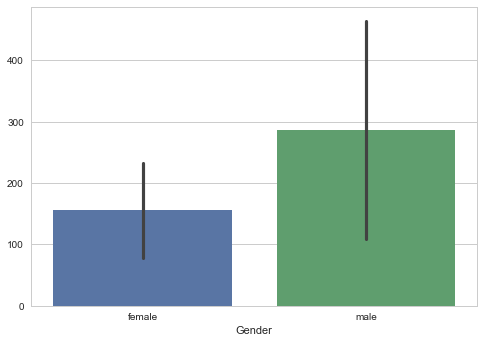

In [127]:
sns.set(style="whitegrid")
ax = sns.barplot(data=survival_gender_contingency)

In [91]:
survival_gender_contingency[survival_gender_contingency.columns[(survival_gender_contingency == 78).iloc[0]].values[0]].sum()

311

---

In [ ]:
corr_df = titanic_df.corr()
corr_df
# sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns)

In [ ]:
plt.matshow(corr_df)

In [ ]:
# https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
# Get code snippet from phanindravarma. Respect.

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_df, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

As the heapmap indicates, `Survival` feature is mostly correlated with `Sex` and `Title`, which have **darkest colors** in the line of Survival. Let's look into these two features and visualize their associations with `Survival`.

#### Survival and Gender

In [ ]:
# Sex and Survival
print("The correlation between survived and sex: %f" % titanic_df['Survived'].corr(titanic_df['Gender'], method='pearson'))
print('-'*40)

dict_survived = {0:'Not Survived', 1:'Survived'}
dict_sex = {0:'Female', 1:'Male'}

survived_values, sex_values, total_num_ss = [], [], []
for tuple_data in [(x,y) for x in range(2) for y in range(2)]:
    count_num = len(titanic_df.groupby(['Survived', 'Sex']).get_group(tuple_data).index)
    
    total_num_ss.append(count_num)
    survived_values.append(dict_survived[tuple_data[0]])
    sex_values.append(dict_sex[tuple_data[1]])

df_ss = pd.DataFrame({'Survival Status':survived_values, 'Sex':sex_values, 'Total_Num':total_num_ss})

sns.barplot(x="Survival Status", y="Total_Num", hue='Sex', data=df_ss)

From the bar chart above, most female passengers survived, but most male passengers didn't make it.

#### Survival and Title

In [ ]:
# Title and Survival
print("The correlation between survived and title: %f" % titanic_df['Survived'].corr(titanic_df['Title'], method='pearson'))
print('-'*40)

dict_title = {1:'Mr', 2:'Miss', 3:'Mrs', 4:'Master', 5:'Rare'}

survived_values, title_values, total_num_st = [], [], []
for tuple_data in [(x,y+1) for x in range(2) for y in range(5)]:
    count_num = len(titanic_df.groupby(['Survived', 'Title']).get_group(tuple_data).index)
    
    total_num_st.append(count_num)
    survived_values.append(dict_survived[tuple_data[0]])
    title_values.append(dict_title[tuple_data[1]])
    
df_st = pd.DataFrame({'Survival Status':survived_values, 'Title':title_values, 'Total_Num':total_num_st})

sns.barplot(x="Survival Status", y="Total_Num", hue='Title', data=df_st)

It's more obvious here in this graph that the main difference between two categories, are the number of adult men in 'Not Survived' group. Therefore, we have this hypothese that need to be testing:
* **`Gender` feature are the factor that made people more likely to survive or not.**

### Hypothesis Testing
Eliminate groups that only correlate to specific features (Alone - Family_Size, Sex - Title, Pclass - Fare);
Population = Male, sample = Female * 30;

#### 1. Identify variables

- **Independent variable**: Gender of each passenger (male and female)
- **Dependent variable**: Survival status of each passenger

#### 2a. Establish hypothesis

* **μ<sub>m</sub>** = male passengers survived population mean
* **μ<sub>f</sub>** = female passengers survived population mean


H<sub>0</sub>: μ<sub>f</sub> - μ<sub>m</sub> = 0
* Null hypothesis: there’s NO difference in numbers between male and female survived means in the population.

H<sub>a</sub>: μ<sub>f</sub> - μ<sub>m</sub> ＞ 0
* Alternative hypothesis: there IS a difference in numbers between male and female survived means in the population. And the survived means of female is larger than the survived means of male.

#### 2b. Establish a statistical test

||Assumptions|
|:---|:---|
|1|Interval or ratio scale of measurement, approximately interval (Scales of measurement)|
|2|Random sampling from a defined population (Experimental design, or Research design)|
|3|Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching (Research design)|
|4|Scores are normally distributed in the population; difference scores are normally distributed (Based on Central Limit Theorem)|

Since I have no idea about population (unknown population parameters), I will perform **2-sample t-test**, to see if the alternative hypothesis reject or fail to reject the null hypothesis.

The test is a **independent test**, since different subjects take the test (*between-subject design*):
* No carry-over effects.
* No need to worry about one treatment can affect another.

Some features in dataset are connected with another features. So we will just keep some of them:
* **`Sex`** and `Title`
* **`Alone`** and `Family_Size`
* **`Pclass`** and `Fare`

In [ ]:
# Wrangling data
testing_df = titanic_df.drop(['Title', 'Family_Size', 'Fare'], axis=1)
testing_df.head()

In [ ]:
# Compute t-statistics and p-value of two samples
from scipy.stats import ttest_ind

female_survived = testing_df.groupby('Sex').get_group((0))['Survived']
male_survived = testing_df.groupby('Sex').get_group((1))['Survived']

ts, pv = ttest_ind(female_survived, male_survived, equal_var = True if male_survived.var() == female_survived.var() else False)
print("t-statistics is %.4f, and p-value is %.4f"%(ts, pv))

The t-statistics is so big that it's obviously larger than one-tailed `99th percentile z-value`, which is 2.3263. Plus, the P-value so small, we can safely draw our conclusion:
* **Reject the null hypothesis**

It appears that the quantity of survived female passengers are *significantly* larger than the number of survived male passengers, at a significant level of .01. This result match my expectation as stated above, when computing sample mean difference.

## 4. CONCLUSIONS

Eventually, after all these steps, we come to a conclusion to answer the question I prosed at the beginning of this project: "What factors made people more likely to survive?"

The answer is, the **`Gender`** of each passenger.